### ¿Qué combinaciones de características demográficas (como edad, nivel educativo y ocupación) son más comunes entre los clientes que utilizan múltiples productos financieros del banco: préstamo, hipoteca, depósito?

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [86]:
# Importamos la vista con las variables que nos interesan para esta pregunta

df_cliente = pd.read_csv("perfil_cliente.csv", delimiter=";")

df_cliente

,age,job,marital,education,balance,housing,loan,deposit
0,59,admin,married,secondary,2343,yes,no,yes
1,59,admin,married,secondary,2343,yes,no,yes
2,56,admin,married,secondary,45,no,no,yes
3,41,technician,married,secondary,1270,yes,no,yes
4,55,services,married,secondary,2476,yes,no,yes
...,...,...,...,...,...,...,...,...
25986,80,retired,married,secondary,173,no,no,no
25987,52,blue-collar,married,primary,1271,no,no,no
25988,65,retired,married,primary,276,no,no,yes
25989,39,admin,married,secondary,1221,no,no,no


In [87]:
# Traducimos los valores del dataset y reconfiguramos las variables de productos a 1 y 0

conditions = [
    (df_cliente["job"] == "admin"),
    (df_cliente["job"] == "technician"),
    (df_cliente["job"] == "unemployed"),
    (df_cliente["job"] == "self-employed"),
    (df_cliente["job"] == "retired"),
    (df_cliente["job"] == "student"),
    (df_cliente["job"] == "blue-collar"),
    (df_cliente["job"] == "management"),
    (df_cliente["job"] == "services"),
    (df_cliente["job"] == "entrepreneur"),
    (df_cliente["job"] == "housemaid")
]

values = ["administrativo", "técnico", "desempleado", "autónomo", 
          "jubilado", "estudiante", "obrero", "manager", "servicios", "emprendedor", "empleado doméstico"]

df_cliente["job"] = np.select(conditions, values)


df_cliente["marital"] = np.where(df_cliente["marital"] == "married", "casado",
                                np.where(df_cliente["marital"] == "single", "soltero",
                                         "divorciado"))

df_cliente["education"] = np.where(df_cliente["education"] == "primary", "primaria",
                                np.where(df_cliente["education"] == "secondary", "secundaria",
                                         "terciaria"))

df_cliente["housing"] = np.where(df_cliente["housing"] == "no", 0, 1)

df_cliente["loan"] = np.where(df_cliente["loan"] == "no", 0, 1)

df_cliente["deposit"] = np.where(df_cliente["deposit"] == "no", 0, 1)


# Y los títulos

df_cliente = df_cliente.rename(columns={"age": "edad", 
                                        "job": "trabajo", 
                                        "marital": "estado civil", 
                                        "education": "educación",
                                        "housing": "hipoteca",
                                        "loan": "préstamo",
                                        "deposit": "depósito"})

df_cliente

,edad,trabajo,estado civil,educación,balance,hipoteca,préstamo,depósito
0,59,administrativo,casado,secundaria,2343,1,0,1
1,59,administrativo,casado,secundaria,2343,1,0,1
2,56,administrativo,casado,secundaria,45,0,0,1
3,41,técnico,casado,secundaria,1270,1,0,1
4,55,servicios,casado,secundaria,2476,1,0,1
...,...,...,...,...,...,...,...,...
25986,80,jubilado,casado,secundaria,173,0,0,0
25987,52,obrero,casado,primaria,1271,0,0,0
25988,65,jubilado,casado,primaria,276,0,0,1
25989,39,administrativo,casado,secundaria,1221,0,0,0


In [88]:
# Confirmamos que no hay valores nulos

(df_cliente.isna().sum() / df_cliente.shape[0] * 100).round(2)


edad            0.0
trabajo         0.0
estado civil    0.0
educación       0.0
balance         0.0
hipoteca        0.0
préstamo        0.0
depósito        0.0
dtype: float64

In [89]:
# Tipos de datos
df_cliente.dtypes

edad             int64
trabajo         object
estado civil    object
educación       object
balance          int64
hipoteca         int32
préstamo         int32
depósito         int32
dtype: object

##### Vamos a convertir las variables numéricas en categóricas

##### Dividiremos balance en tres grupos:

* **Negativo:** menores a 0
* **Normal:** entre 0 y el percentil 75
* **Alto:** mayor al percentil 75

In [90]:
# Reconfiguramos la variable edad

conditions = [
    (df_cliente["edad"] < 30),
    (df_cliente["edad"] >= 30) & (df_cliente["edad"] < 40),
    (df_cliente["edad"] >= 40) & (df_cliente["edad"] < 50),
    (df_cliente["edad"] >= 50) & (df_cliente["edad"] < 60),
    (df_cliente["edad"] >= 60) & (df_cliente["edad"] < 70),
    (df_cliente["edad"] >= 70) & (df_cliente["edad"] < 80),
    (df_cliente["edad"] >= 80)
]

values = ["18-29", "30-39", "40-49", "50-59", "60-69", "70-79", "80+"]

df_cliente["edad"] = np.select(conditions, values)

# Y también balance

percentil_75 = df_cliente["balance"].quantile(0.75)

conditions = [
    (df_cliente["balance"] < 0),
    (df_cliente["balance"] >= 0) & (df_cliente["balance"] <= percentil_75),
    (df_cliente["balance"] > percentil_75)
]

values = ["negativo", "normal", "alto"]

df_cliente["balance"] = np.select(conditions, values)

df_cliente


,edad,trabajo,estado civil,educación,balance,hipoteca,préstamo,depósito
0,50-59,administrativo,casado,secundaria,alto,1,0,1
1,50-59,administrativo,casado,secundaria,alto,1,0,1
2,50-59,administrativo,casado,secundaria,normal,0,0,1
3,40-49,técnico,casado,secundaria,normal,1,0,1
4,50-59,servicios,casado,secundaria,alto,1,0,1
...,...,...,...,...,...,...,...,...
25986,80+,jubilado,casado,secundaria,normal,0,0,0
25987,50-59,obrero,casado,primaria,normal,0,0,0
25988,60-69,jubilado,casado,primaria,normal,0,0,1
25989,30-39,administrativo,casado,secundaria,normal,0,0,0


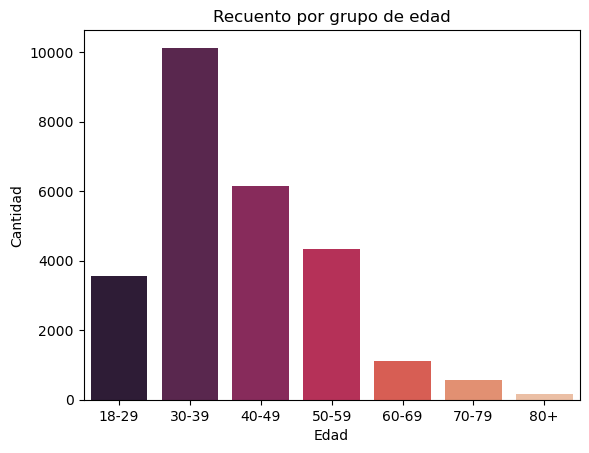

In [91]:
g = sns.barplot(data=df_cliente["edad"].value_counts().reset_index(),
              x="edad",
              y="count",
              palette= "rocket",
              order= ["18-29",
                      "30-39",
                      "40-49",
                      "50-59",
                      "60-69",
                      "70-79",
                      "80+"])

g.set(xlabel="Edad", ylabel="Cantidad")
g.set_title("Recuento por grupo de edad");

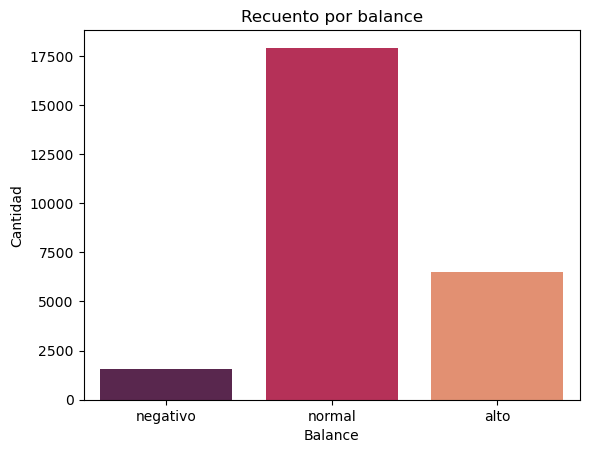

In [92]:
g = sns.barplot(data=df_cliente["balance"].value_counts().reset_index(),
              x="balance",
              y="count",
              palette= "rocket",
              order= ["negativo",
                      "normal",
                      "alto"])

g.set(xlabel="Balance", ylabel="Cantidad")
g.set_title("Recuento por balance");

#### Creamos una nueva variable con la cantidad de productos por cliente. Para poder hacer esto, vamos a reconfigurar las variables de productos financieros a 1 y 0.

In [101]:
df_cliente["productos"] = df_cliente["hipoteca"] + df_cliente["préstamo"] + df_cliente["depósito"]

df_cliente["productos"].value_counts().reset_index().sort_values(by="productos").set_index("productos")

,count
productos,
0,4898
1,14679
2,5811
3,603


In [115]:
# Vemos los clientes que tienen contratados más de 2 productos

clientes_multiples_productos = df_cliente[df_cliente["productos"] >= 2]

clientes_agrupados = clientes_multiples_productos.groupby(["edad", "trabajo", "estado civil", "educación", "balance"])\
                    .size()\
                    .reset_index(name="clientes múltiples productos")\
                    .sort_values(by="clientes múltiples productos", ascending=False, ignore_index=True)
totales_por_grupo = df_cliente.groupby(["edad", "trabajo", "estado civil", "educación", "balance"])\
                                                .size()\
                                                .reset_index(name="total grupo")

clientes_agrupados = clientes_agrupados.merge(totales_por_grupo, on=["edad", "trabajo", "estado civil", "educación", "balance"])

clientes_agrupados["porcentaje clientes"] = round((clientes_agrupados["clientes múltiples productos"] / clientes_agrupados["total grupo"]) * 100, 2)

clientes_agrupados = clientes_agrupados.sort_values(by="clientes múltiples productos", ascending=False)

clientes_agrupados


,edad,trabajo,estado civil,educación,balance,clientes múltiples productos,total grupo,porcentaje clientes
0,30-39,obrero,casado,secundaria,normal,243,541,44.92
1,30-39,manager,casado,terciaria,normal,218,909,23.98
2,30-39,manager,soltero,terciaria,normal,172,767,22.43
3,40-49,obrero,casado,secundaria,normal,142,389,36.50
4,30-39,técnico,casado,secundaria,normal,139,466,29.83
...,...,...,...,...,...,...,...,...
453,18-29,técnico,casado,secundaria,alto,1,5,20.00
454,40-49,servicios,casado,terciaria,negativo,1,1,100.00
455,50-59,autónomo,soltero,terciaria,normal,1,1,100.00
456,30-39,administrativo,casado,terciaria,alto,1,16,6.25


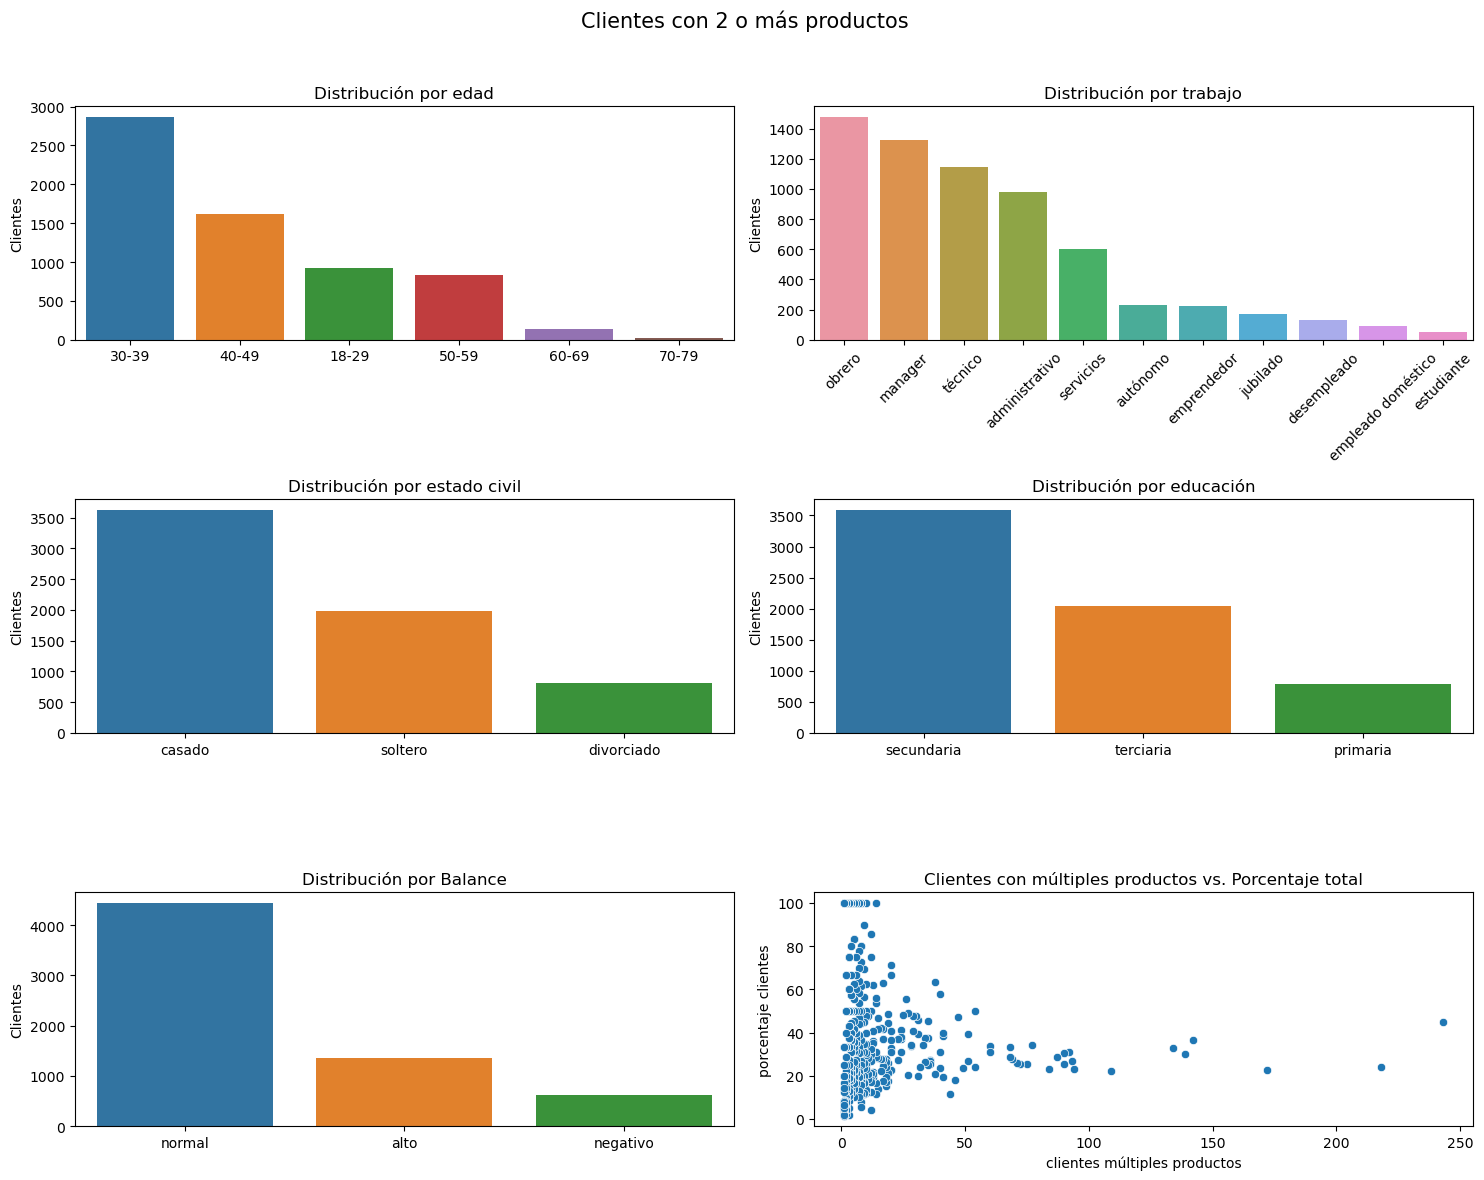

In [134]:
fig, axes = plt.subplots(3, 2, figsize=(15, 12))
fig.suptitle("Clientes con 2 o más productos", fontsize=15)

# Distribución por edad
sns.countplot(x="edad", data=clientes_multiples_productos, ax=axes[0, 0],
              order= clientes_multiples_productos["edad"].value_counts().index)
axes[0, 0].set_title("Distribución por edad")
axes[0, 0].set_ylabel("Clientes")
axes[0, 0].set_xlabel(None)

# Distribución por trabajo

sns.countplot(x="trabajo", data=clientes_multiples_productos, ax=axes[0, 1], 
              order= clientes_multiples_productos["trabajo"].value_counts().index)
axes[0, 1].set_title("Distribución por trabajo")
axes[0, 1].set_ylabel("Clientes")
axes[0, 1].set_xlabel(None)
axes[0, 1].tick_params(axis="x", rotation=45)

# Distribución por estado civil
sns.countplot(x="estado civil", data=clientes_multiples_productos, ax=axes[1, 0],
              order= clientes_multiples_productos["estado civil"].value_counts().index)
axes[1, 0].set_title("Distribución por estado civil")
axes[1, 0].set_ylabel("Clientes")
axes[1, 0].set_xlabel(None)

# Distribución por educación
sns.countplot(x="educación", data=clientes_multiples_productos, ax=axes[1, 1],
              order= clientes_multiples_productos["educación"].value_counts().index)
axes[1, 1].set_title("Distribución por educación")
axes[1, 1].set_ylabel("Clientes")
axes[1, 1].set_xlabel(None)

# Distribución por balance
sns.countplot(x="balance", data=clientes_multiples_productos, ax=axes[2, 0],
              order= clientes_multiples_productos["balance"].value_counts().index)
axes[2, 0].set_title("Distribución por Balance")
axes[2, 0].set_ylabel("Clientes")
axes[2, 0].set_xlabel(None)

# Clientes vs. % total
sns.scatterplot(data=clientes_agrupados,
                    x="clientes múltiples productos",
                    y="porcentaje clientes",
                    ax=axes[2, 1])
axes[2,1].set_title("Clientes con múltiples productos vs. Porcentaje total")

plt.tight_layout(rect=[0, 0, 1, 0.96]) 
plt.show()